In [1]:
#Syed Shayan Abbas Naqvi
#l180988@lhr.nu.edu.pk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
df = pd.read_csv("Iris.csv")
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
#feature_scaling
df_int = df[["sepallength","sepalwidth","petallength","petalwidth"]]
df_int.head()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_df = sc.fit_transform(df_int)
scaled_df[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [3]:
features = scaled_df.T
cv = np.cov(features)
cv[:5]

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [4]:
eigen_values , eigen_vectors = np.linalg.eigh(cv)
variance = []
size = len(eigen_values)
for i in range(size):
    variance.append(eigen_values[i]/np.sum(eigen_values))
print(variance) #2 principal components are made as majority of variance accounts for these last 2

[0.005151926808906339, 0.03683831957627372, 0.23030523267680636, 0.7277045209380135]


In [5]:
P1 = scaled_df.dot(eigen_vectors.T[2])
P2 = scaled_df.dot(eigen_vectors.T[3])
final = pd.DataFrame(P1, columns=["PC1"])
final["PC2"] = P2
final["class"] = df["class"]
final.head()

,PC1,PC2,class
0,0.505704,2.264542,Iris-setosa
1,-0.655405,2.086426,Iris-setosa
2,-0.318477,2.367950,Iris-setosa
3,-0.575368,2.304197,Iris-setosa
4,0.674767,2.388777,Iris-setosa


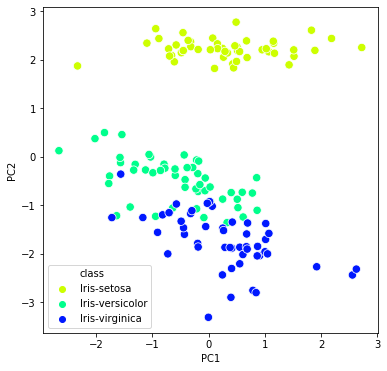

In [6]:
import seaborn as sb
 
plt.figure(figsize = (6,6))
sb.scatterplot(data = final , x = 'PC1',y = 'PC2' , hue = 'class' , s = 70 , palette= 'gist_rainbow')

In [7]:
#K-Means Clustering
#Taking the dataset without the class label for clustering
df2 = final[["PC1","PC2"]]
df2.head()

,PC1,PC2
0,0.505704,2.264542
1,-0.655405,2.086426
2,-0.318477,2.367950
3,-0.575368,2.304197
4,0.674767,2.388777


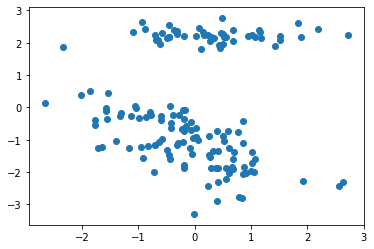

In [8]:
plt.scatter(df2["PC1"],df2["PC2"])

In [9]:
df2.shape

(150, 2)

In [10]:
class MyKMeans:
    def __init__(self,clusters=2,iterations=100):
        self.clusters = clusters
        self.iterations = iterations
        self.centroids = None

    def fit(self,X):

        idx = random.sample(range(0,X.shape[0]),self.clusters)
        self.centroids = X[idx]

        for i in range(self.iterations):
            cluster_group = self.assignment(X)
            old_centroids = self.centroids
            self.centroids = self.movement(X,cluster_group)
            if (old_centroids == self.centroids).all(): #no change so stop
                break

        return cluster_group,old_centroids

    def assignment(self,X):
        cluster_group = []
        distances = []

        for examples in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(examples-centroid,examples-centroid)))
            min_dist = min(distances)
            pos = distances.index(min_dist)
            cluster_group.append(pos)
            distances.clear()

        return np.array(cluster_group)

    def movement(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)
    
    #def SSE(self,a,b):
        #error = np.square(np.sum((a-b)**2))
        #return error
        

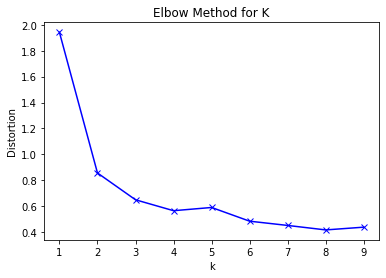

In [14]:
#without PCA
X = df_int.iloc[:,:].values
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    km = MyKMeans(clusters=k,iterations=400)
    km.fit(X)
    distortions.append(sum(np.min(cdist(X, km.centroids, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method for K')
plt.show()

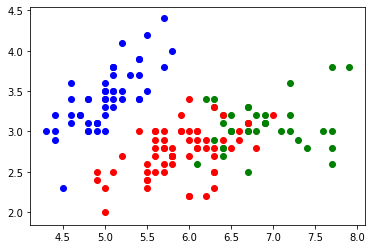

In [16]:
#K = 3 is chosen from the elbow method
km = MyKMeans(clusters=3,iterations=400)
cluster,c = km.fit(X)

plt.scatter(X[cluster == 0,0],X[cluster == 0,1],color='blue')
plt.scatter(X[cluster == 1,0],X[cluster == 1,1],color='green')
plt.scatter(X[cluster == 2,0],X[cluster == 2,1],color='red')


plt.show()
#No PCA so data visualization is not so clear and clustering is not optimal

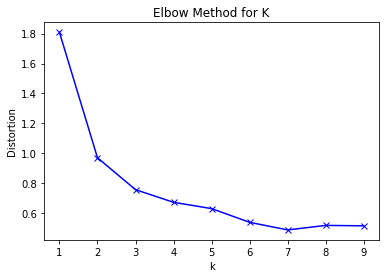

In [18]:
X = df2.iloc[:,:].values
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    km = MyKMeans(clusters=k,iterations=400)
    km.fit(X)
    distortions.append(sum(np.min(cdist(X, km.centroids, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method for K')
plt.show()

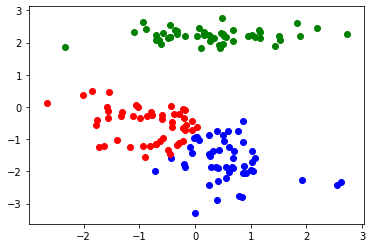

In [19]:
#K = 3 is chosen from the elbow method
km = MyKMeans(clusters=3,iterations=400)
cluster,c = km.fit(X)

plt.scatter(X[cluster == 0,0],X[cluster == 0,1],color='blue')
plt.scatter(X[cluster == 1,0],X[cluster == 1,1],color='green')
plt.scatter(X[cluster == 2,0],X[cluster == 2,1],color='red')


plt.show()

In [20]:
#NN
#implementing without PCA first
x = df_int
y = df["class"]
x,y


(     sepallength  sepalwidth  petallength  petalwidth
 0            5.1         3.5          1.4         0.2
 1            4.9         3.0          1.4         0.2
 2            4.7         3.2          1.3         0.2
 3            4.6         3.1          1.5         0.2
 4            5.0         3.6          1.4         0.2
 ..           ...         ...          ...         ...
 145          6.7         3.0          5.2         2.3
 146          6.3         2.5          5.0         1.9
 147          6.5         3.0          5.2         2.0
 148          6.2         3.4          5.4         2.3
 149          5.9         3.0          5.1         1.8
 
 [150 rows x 4 columns],
 0         Iris-setosa
 1         Iris-setosa
 2         Iris-setosa
 3         Iris-setosa
 4         Iris-setosa
             ...      
 145    Iris-virginica
 146    Iris-virginica
 147    Iris-virginica
 148    Iris-virginica
 149    Iris-virginica
 Name: class, Length: 150, dtype: object)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = pd.DataFrame(encoder.fit_transform(y))
types = {index : label for index, label in enumerate(encoder.classes_)}
types
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 40)

In [23]:
import tensorflow as tf

In [24]:
inputs = tf.keras.Input(shape = (4, ))
x = tf.keras.layers.Dense(256, activation = 'relu')(inputs)
x = tf.keras.layers.Dense(256, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(3, activation = 'softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)



history = model.fit(X_train,y_train,epochs = 100)




Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9725 - accuracy: 0.4000
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7496 - accuracy: 0.7083
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.8500
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5115 - accuracy: 0.7917
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.8917
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3851 - accuracy: 0.9417
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3448 - accuracy: 0.9667
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.9417
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2830 - accuracy: 0.9750
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2543 - accuracy: 0.9750
Epoch 11/100
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0807 - accuracy: 0.9750
Epoch 85/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.9500
Epoch 86/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0897 - accuracy: 0.9667
Epoch 87/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0869 - accuracy: 0.9667
Epoch 88/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.9583
Epoch 89/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0824 - accuracy: 0.9667
Epoch 90/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1047 - accuracy: 0.9333
Epoch 91/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0727 - accuracy: 0.9833
Epoch 92/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0768 - accuracy: 0.9833
Epoch 93/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0669 - accuracy: 0.9750
Epoch 94/100
4/4 [===============

In [25]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 70ms/step - loss: 0.0554 - accuracy: 1.0000


[0.055355943739414215, 1.0]

In [26]:
predictions = model.predict(X_test)
preds = []
for i in range(len(X_test)):
    val = np.argmax(predictions[i]) #predictions of all the test samples
    print(val)
    preds.append(val)

0
1
2
2
1
2
1
1
1
0
1
0
0
2
1
2
2
2
1
1
2
2
1
0
1
0
0
2
0
1


In [27]:
#for the PCA data now
x2 = df2
y2 = df["class"]
x2,y2

(          PC1       PC2
 0    0.505704  2.264542
 1   -0.655405  2.086426
 2   -0.318477  2.367950
 3   -0.575368  2.304197
 4    0.674767  2.388777
 ..        ...       ...
 145  0.382822 -1.870522
 146 -0.905314 -1.558492
 147  0.266795 -1.520845
 148  1.016362 -1.376391
 149 -0.022284 -0.959299
 
 [150 rows x 2 columns],
 0         Iris-setosa
 1         Iris-setosa
 2         Iris-setosa
 3         Iris-setosa
 4         Iris-setosa
             ...      
 145    Iris-virginica
 146    Iris-virginica
 147    Iris-virginica
 148    Iris-virginica
 149    Iris-virginica
 Name: class, Length: 150, dtype: object)

In [28]:
encoder = LabelEncoder()
y2 = pd.DataFrame(encoder.fit_transform(y2))
types2 = {index : label for index, label in enumerate(encoder.classes_)}
types2
y2

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [29]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, train_size = 0.8, random_state = 40)

In [30]:
inputs2 = tf.keras.Input(shape = (2, ))
x2 = tf.keras.layers.Dense(256, activation = 'relu')(inputs2)
x2 = tf.keras.layers.Dense(256, activation = 'relu')(x2)
outputs2 = tf.keras.layers.Dense(3, activation = 'softmax')(x2)

model2 = tf.keras.Model(inputs2, outputs2)

model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)



history2 = model2.fit(X_train2,y_train2,epochs = 100)




Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9334 - accuracy: 0.7917
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.8000
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5403 - accuracy: 0.8000
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4610 - accuracy: 0.8000
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8000
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3833 - accuracy: 0.8000
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3605 - accuracy: 0.8083
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 0.8250
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.8250
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.8333
Epoch 11/100
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.1465 - accuracy: 0.9083
Epoch 85/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1452 - accuracy: 0.9167
Epoch 86/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1451 - accuracy: 0.9250
Epoch 87/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1461 - accuracy: 0.9167
Epoch 88/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1474 - accuracy: 0.9167
Epoch 89/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1450 - accuracy: 0.9167
Epoch 90/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1432 - accuracy: 0.9167
Epoch 91/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1443 - accuracy: 0.9167
Epoch 92/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1441 - accuracy: 0.9167
Epoch 93/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1431 - accuracy: 0.9167
Epoch 94/100
4/4 [===============

In [31]:
model2.evaluate(X_test2, y_test2)

1/1 [==============================] - 0s 56ms/step - loss: 0.1626 - accuracy: 0.9333


[0.16255633533000946, 0.9333333373069763]

In [32]:
predictions2 = model2.predict(X_test2)
preds2 = []
for i in range(len(X_test2)):
    val = np.argmax(predictions2[i]) #predictions of all the test samples
    print(val)
    preds2.append(val)
preds2

0
1
2
2
1
2
2
1
1
0
1
0
0
2
1
2
2
2
2
1
2
2
1
0
1
0
0
2
0
1


[0,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 1]